In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("D:\\pga_31\\datasets projects\\project\\spotify\\spotify_songs.csv")
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
pd.set_option('display.max_columns',None)

### missing values

In [4]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [5]:
df[['track_name','track_artist']]=df[['track_name','track_artist']].fillna('Unknown')

In [6]:
df['track_artist'].value_counts()

track_artist
Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
                   ... 
New Medicine          1
Ra                    1
Nomy                  1
Paul Stanley          1
Mat Zo                1
Name: count, Length: 10693, dtype: int64

# EXPLANATORY DATA ANALYSIS(EDA)

In [7]:
df["release_date"]=pd.DatetimeIndex(df["track_album_release_date"]).day
df["release_month"]=pd.DatetimeIndex(df["track_album_release_date"]).month
df["release_year"]=pd.DatetimeIndex(df["track_album_release_date"]).year

In [8]:
encoder = OneHotEncoder()
gn = df['playlist_genre'].values.reshape(-1,1)
encoded_genre = encoder.fit_transform(gn)

In [9]:
encoded_genre

<32833x6 sparse matrix of type '<class 'numpy.float64'>'
	with 32833 stored elements in Compressed Sparse Row format>

In [10]:
full_encoded_data = encoded_genre.toarray()
full_encoded_df = pd.DataFrame(full_encoded_data, columns=encoder.get_feature_names_out(['playlist_genre']))


In [11]:
full_encoded_df

,playlist_genre_edm,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
32828,1.0,0.0,0.0,0.0,0.0,0.0
32829,1.0,0.0,0.0,0.0,0.0,0.0
32830,1.0,0.0,0.0,0.0,0.0,0.0
32831,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df = pd.concat([df, full_encoded_df], axis=1)

In [13]:
le = LabelEncoder()
df['track_artist']= le.fit_transform(df['track_artist'])
#df['subgenre']= le.fit_transform(df['playlist_subgenre'])
# df['genre'] = le.fit_transform(df['playlist_genre'])
#df[['genre']].ndim

In [14]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_month,release_year,playlist_genre_edm,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,14,6,2019,0.0,0.0,1.0,0.0,0.0,0.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,6084,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,13,12,2019,0.0,0.0,1.0,0.0,0.0,0.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,10417,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,5,7,2019,0.0,0.0,1.0,0.0,0.0,0.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,9215,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,19,7,2019,0.0,0.0,1.0,0.0,0.0,0.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,5402,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,5,3,2019,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
df.playlist_genre.unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [18]:
df['playlist_genre'].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [19]:
df['playlist_subgenre'].value_counts()

playlist_subgenre
progressive electro house    1809
southern hip hop             1675
indie poptimism              1672
latin hip hop                1656
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1458
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     949
Name: count, dtype: int64

In [20]:
df['playlist_subgenre'].nunique()

24

In [22]:
df['playlist_subgenre'].nunique()

24

In [23]:
df[['track_artist','track_name']].nunique()

track_artist    10693
track_name      23450
dtype: int64

In [24]:
df['track_id'].nunique()

28356

In [26]:
#unique_songs

In [27]:
# for index, column in enumerate(unique_songs.columns):
#     print(f"{index}: {column}")

In [28]:
#unique_songs.columns

In [29]:
#Hindrances=unique_songs.columns[[0,4,5,6,7,8,9,10]]

In [30]:
#remv_cols=unique_songs.drop(Hindrances,axis=1)

In [31]:
#remv_cols

In [32]:
df['release_year'].unique()

array([2019, 2018, 2017, 2016, 2014, 2012, 2015, 2013, 2011, 2010, 2008,
       2020, 2007, 1998, 1996, 1999, 2009, 1993, 1995, 1991, 2000, 1994,
       1992, 1997, 2001, 2006, 2002, 2003, 2005, 1990, 2004, 1988, 1984,
       1982, 1973, 1979, 1977, 1981, 1974, 1970, 1976, 1987, 1978, 1969,
       1986, 1980, 1983, 1985, 1989, 1975, 1968, 1971, 1972, 1967, 1966,
       1965, 1964, 1963, 1962, 1957, 1958, 1961, 1960])

In [33]:
df['release_year'].nunique()

63

In [35]:
#unique_songs.columns[[0,4,5,6,7,8,9,10]]

In [36]:
df['track_artist'].value_counts()

track_artist
6098    161
7576    136
9215    123
2333    110
2598    102
       ... 
6797      1
7650      1
6936      1
7307      1
6140      1
Name: count, Length: 10693, dtype: int64

In [38]:
#artist_year_counts['song_count'].unique()

In [39]:
df['track_artist'].nunique()

10693

In [40]:
artist_year_table = df.groupby(['track_artist', 'release_year']).size().unstack(fill_value=0)
artist_year_table_sorted = artist_year_table.loc[artist_year_table.sum(axis=1).sort_values(ascending=False).index]

In [41]:
artist_year_table_sorted

release_year,1957,1958,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
track_artist,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6098,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,17,14,28,25,27,36,0
7576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,27,17,13,15,15,0,12,3,11,0,1,0,2,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0
9215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9,42,16,16,39,0
2333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4,1,6,5,10,17,1,19,4,2,2,17,19,1
2598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,9,0,13,0,2,9,21,0,10,0,3,13,13,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
year=pd.read_excel("D:\yeardata.xlsx")

In [43]:
#artist_year_table_sorted.to_csv('D://Artist_year')
#Artist_year=pd.read_csv("D://artist_year_compiled")

In [44]:
year=year[year.columns[:65]]

In [45]:
year.head()

,track_artist,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Martin Garrix,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,17,14,28,25,27,36,0
1,Queen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,27,17,13,15,15,0,12,3,11,0,1,0,2,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0
2,The Chainsmokers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9,42,16,16,39,0
3,David Guetta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4,1,6,5,10,17,1,19,4,2,2,17,19,1
4,Don Omar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,9,0,13,0,2,9,21,0,10,0,3,13,13,1,0,3,0


In [46]:
year['track_artist']

0           Martin Garrix
1                   Queen
2        The Chainsmokers
3            David Guetta
4                Don Omar
               ...       
10688    Men Without Hats
10689    Memphis May Fire
10690       Memphis Bleek
10691        Melvin Ayala
10692                香取慎吾
Name: track_artist, Length: 10693, dtype: object

In [47]:
release_year_in=year.columns[1:]

In [48]:
release_year_in

Index([1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020],
      dtype='object')

In [ ]:
# for df['track_artist'],df['release_year'] in release_year_in:
#     df['song_in_year']=
    

In [49]:
artist_year_count = df.groupby(['track_artist', 'release_year']).size().reset_index(name='songs_count')

In [50]:
artist_year_count

,track_artist,release_year,songs_count
0,0,2013,2
1,1,2012,1
2,1,2019,4
3,2,2018,1
4,3,2019,1
...,...,...,...
17005,10688,2020,1
17006,10689,2019,1
17007,10690,2019,1
17008,10691,2016,1


In [53]:
# artist_year_pivot = artist_year_count.pivot(index='track_artist', columns='release_year', values='songs_count').reset_index()
# merged_table = pd.merge(df, artist_year_pivot, how='left', on='track_artist')
# merged_table = merged_table.fillna(0)
#merged_table

In [54]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_month,release_year,playlist_genre_edm,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,14,6,2019,0.0,0.0,1.0,0.0,0.0,0.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,6084,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,13,12,2019,0.0,0.0,1.0,0.0,0.0,0.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,10417,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,5,7,2019,0.0,0.0,1.0,0.0,0.0,0.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,9215,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,19,7,2019,0.0,0.0,1.0,0.0,0.0,0.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,5402,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,5,3,2019,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
#artist_year_table_sorted.loc['Queen']

In [57]:
artist_year_table = df.groupby(['track_artist', 'release_year']).size().unstack(fill_value=0)
all_years = range(1957, df['release_year'].max() + 1)
artist_year_table_filled = artist_year_table.reindex(columns=all_years, fill_value=0)
artist_year_table_sorted = artist_year_table_filled.loc[artist_year_table_filled.sum(axis=1).sort_values(ascending=False).index]

In [58]:
artist_year_table_sorted.head()

release_year,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
track_artist,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6098,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,17,14,28,25,27,36,0
7576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,27,17,13,15,15,0,12,3,11,0,1,0,2,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0
9215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9,42,16,16,39,0
2333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4,1,6,5,10,17,1,19,4,2,2,17,19,1
2598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,9,0,13,0,2,9,21,0,10,0,3,13,13,1,0,3,0


In [25]:
pd.set_option('display.max_rows',None)

In [94]:
#artist_year_table_sorted.loc['Queen']

In [37]:
# for index, row in df.iterrows():
#     artist = row['track_artist']
#     release_year = row['release_year']
#     year_range = range(1957, release_year + 1)

#     if artist not in cumulative_sum_dict:
#         cumulative_sum_dict[artist] = 0
#     cumulative_sum_dict[artist] += artist_year_table_sorted.loc[artist, year_range].sum()
# cumulative_sum_df = pd.DataFrame(list(cumulative_sum_dict.items()), columns=['track_artist', 'cumulative_sum'])
# cumulative_sum_df.head()

In [59]:
df.head(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_month,release_year,playlist_genre_edm,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754,14,6,2019,0.0,0.0,1.0,0.0,0.0,0.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,6084,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600,13,12,2019,0.0,0.0,1.0,0.0,0.0,0.0


In [60]:
df['total_songs'] = df.groupby('track_artist')['track_artist'].transform('count')

In [61]:
df.head(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_month,release_year,playlist_genre_edm,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,total_songs
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,14,6,2019,0.0,0.0,1.0,0.0,0.0,0.0,69
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,6084,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,13,12,2019,0.0,0.0,1.0,0.0,0.0,0.0,71
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,10417,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,5,7,2019,0.0,0.0,1.0,0.0,0.0,0.0,28


# pca

In [62]:
unique_songs=df.drop_duplicates(subset=['track_id'],keep='first')

In [63]:
unique_songs.head(4)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_month,release_year,playlist_genre_edm,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,total_songs
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,14,6,2019,0.0,0.0,1.0,0.0,0.0,0.0,69
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,6084,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,13,12,2019,0.0,0.0,1.0,0.0,0.0,0.0,71
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,10417,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,5,7,2019,0.0,0.0,1.0,0.0,0.0,0.0,28
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,9215,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,19,7,2019,0.0,0.0,1.0,0.0,0.0,0.0,123


In [64]:
for index, column_name in enumerate(unique_songs.columns):
    print(f"{index}: {column_name}")

0: track_id
1: track_name
2: track_artist
3: track_popularity
4: track_album_id
5: track_album_name
6: track_album_release_date
7: playlist_name
8: playlist_id
9: playlist_genre
10: playlist_subgenre
11: danceability
12: energy
13: key
14: loudness
15: mode
16: speechiness
17: acousticness
18: instrumentalness
19: liveness
20: valence
21: tempo
22: duration_ms
23: release_date
24: release_month
25: release_year
26: playlist_genre_edm
27: playlist_genre_latin
28: playlist_genre_pop
29: playlist_genre_r&b
30: playlist_genre_rap
31: playlist_genre_rock
32: total_songs


In [146]:
#unique_songs.rename(columns={"cumulative_sum":"song_by_artist",},inplace=True)

In [65]:
unique_songs.columns = [col.replace('playlist_genre', 'genre') for col in unique_songs.columns]

In [66]:
unique_songs.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'release_date', 'release_month', 'release_year',
       'genre_edm', 'genre_latin', 'genre_pop', 'genre_r&b', 'genre_rap',
       'genre_rock', 'total_songs'],
      dtype='object')

In [67]:
Hindrances=unique_songs.columns[[0,4,5,6,7,8,9,10]]

In [68]:
data=unique_songs.drop(Hindrances,axis=1)

In [69]:
data.head(3)

,track_name,track_artist,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_month,release_year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,total_songs
0,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,14,6,2019,0.0,0.0,1.0,0.0,0.0,0.0,69
1,Memories - Dillon Francis Remix,6084,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,13,12,2019,0.0,0.0,1.0,0.0,0.0,0.0,71
2,All the Time - Don Diablo Remix,10417,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,5,7,2019,0.0,0.0,1.0,0.0,0.0,0.0,28


In [70]:
data.shape

(28356, 25)

In [82]:
# 

In [83]:
df_with_pca.head(2)

,track_name,track_artist,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_month,release_year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,total_songs,PC1,PC2,PC3
0,I Don't Care (with Justin Bieber) - Loud Luxur...,2782.0,66.0,0.748,0.916,6.0,-2.634,1.0,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754.0,14.0,6.0,2019.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,-0.412782,-0.143048,-0.192000
1,Memories - Dillon Francis Remix,6084.0,67.0,0.726,0.815,11.0,-4.969,1.0,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600.0,13.0,12.0,2019.0,0.0,0.0,1.0,0.0,0.0,0.0,71.0,-0.323329,-0.593328,-0.251634


In [84]:
#df_with_pca.shape

(31769, 28)

In [128]:
#df_with_pca.head(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_month,release_year,playlist_genre_edm,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,total_songs,PC1,PC2,PC3,PC4
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754,14,6,2019,0.0,0.0,1.0,0.0,0.0,0.0,69,-1.540142,-0.527212,-0.794832,-0.467113
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600,13,12,2019,0.0,0.0,1.0,0.0,0.0,0.0,71,-1.090017,-0.879849,0.171874,-0.145500


In [159]:
feature=data[data.columns[1:]]

In [160]:
feature.head()

,track_artist,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_month,release_year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,total_songs,categorized_popularity
0,2782,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,14,6,2019,0.0,0.0,1.0,0.0,0.0,0.0,69,2.0
1,6084,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,13,12,2019,0.0,0.0,1.0,0.0,0.0,0.0,71,1.0
2,10417,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,5,7,2019,0.0,0.0,1.0,0.0,0.0,0.0,28,1.0
3,9215,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,19,7,2019,0.0,0.0,1.0,0.0,0.0,0.0,123,2.0
4,5402,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,5,3,2019,0.0,0.0,1.0,0.0,0.0,0.0,21,1.0


In [163]:
feature.drop('track_popularity',axis=1,inplace=True)

C:\Users\ABRAHAM-ZIEGEN\AppData\Local\Temp\ipykernel_7708\4074505275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature.drop('track_popularity',axis=1,inplace=True)


In [164]:
feature.head(2)

,track_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_month,release_year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,total_songs,categorized_popularity
0,2782,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754,14,6,2019,0.0,0.0,1.0,0.0,0.0,0.0,69,2.0
1,6084,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600,13,12,2019,0.0,0.0,1.0,0.0,0.0,0.0,71,1.0


In [157]:
data.head()

,track_name,track_artist,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_month,release_year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,total_songs,categorized_popularity
0,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,14,6,2019,0.0,0.0,1.0,0.0,0.0,0.0,69,2.0
1,Memories - Dillon Francis Remix,6084,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,13,12,2019,0.0,0.0,1.0,0.0,0.0,0.0,71,1.0
2,All the Time - Don Diablo Remix,10417,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,5,7,2019,0.0,0.0,1.0,0.0,0.0,0.0,28,1.0
3,Call You Mine - Keanu Silva Remix,9215,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,19,7,2019,0.0,0.0,1.0,0.0,0.0,0.0,123,2.0
4,Someone You Loved - Future Humans Remix,5402,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,5,3,2019,0.0,0.0,1.0,0.0,0.0,0.0,21,1.0


In [91]:
feature1=feature1.drop('track_popularity',axis=1)

In [92]:
data[data.columns[1:]]

,track_artist,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_month,release_year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,total_songs
0,2782,66,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,14,6,2019,0.0,0.0,1.0,0.0,0.0,0.0,69
1,6084,67,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,13,12,2019,0.0,0.0,1.0,0.0,0.0,0.0,71
2,10417,70,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,5,7,2019,0.0,0.0,1.0,0.0,0.0,0.0,28
3,9215,60,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,19,7,2019,0.0,0.0,1.0,0.0,0.0,0.0,123
4,5402,69,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,5,3,2019,0.0,0.0,1.0,0.0,0.0,0.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,5725,42,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,28,4,2014,1.0,0.0,0.0,0.0,0.0,0.0,2
32829,9102,20,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,8,3,2013,1.0,0.0,0.0,0.0,0.0,0.0,1
32830,8746,14,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,21,4,2014,1.0,0.0,0.0,0.0,0.0,0.0,2
32831,6140,15,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,1,1,2014,1.0,0.0,0.0,0.0,0.0,0.0,1


In [93]:
cor=feature1.corr()

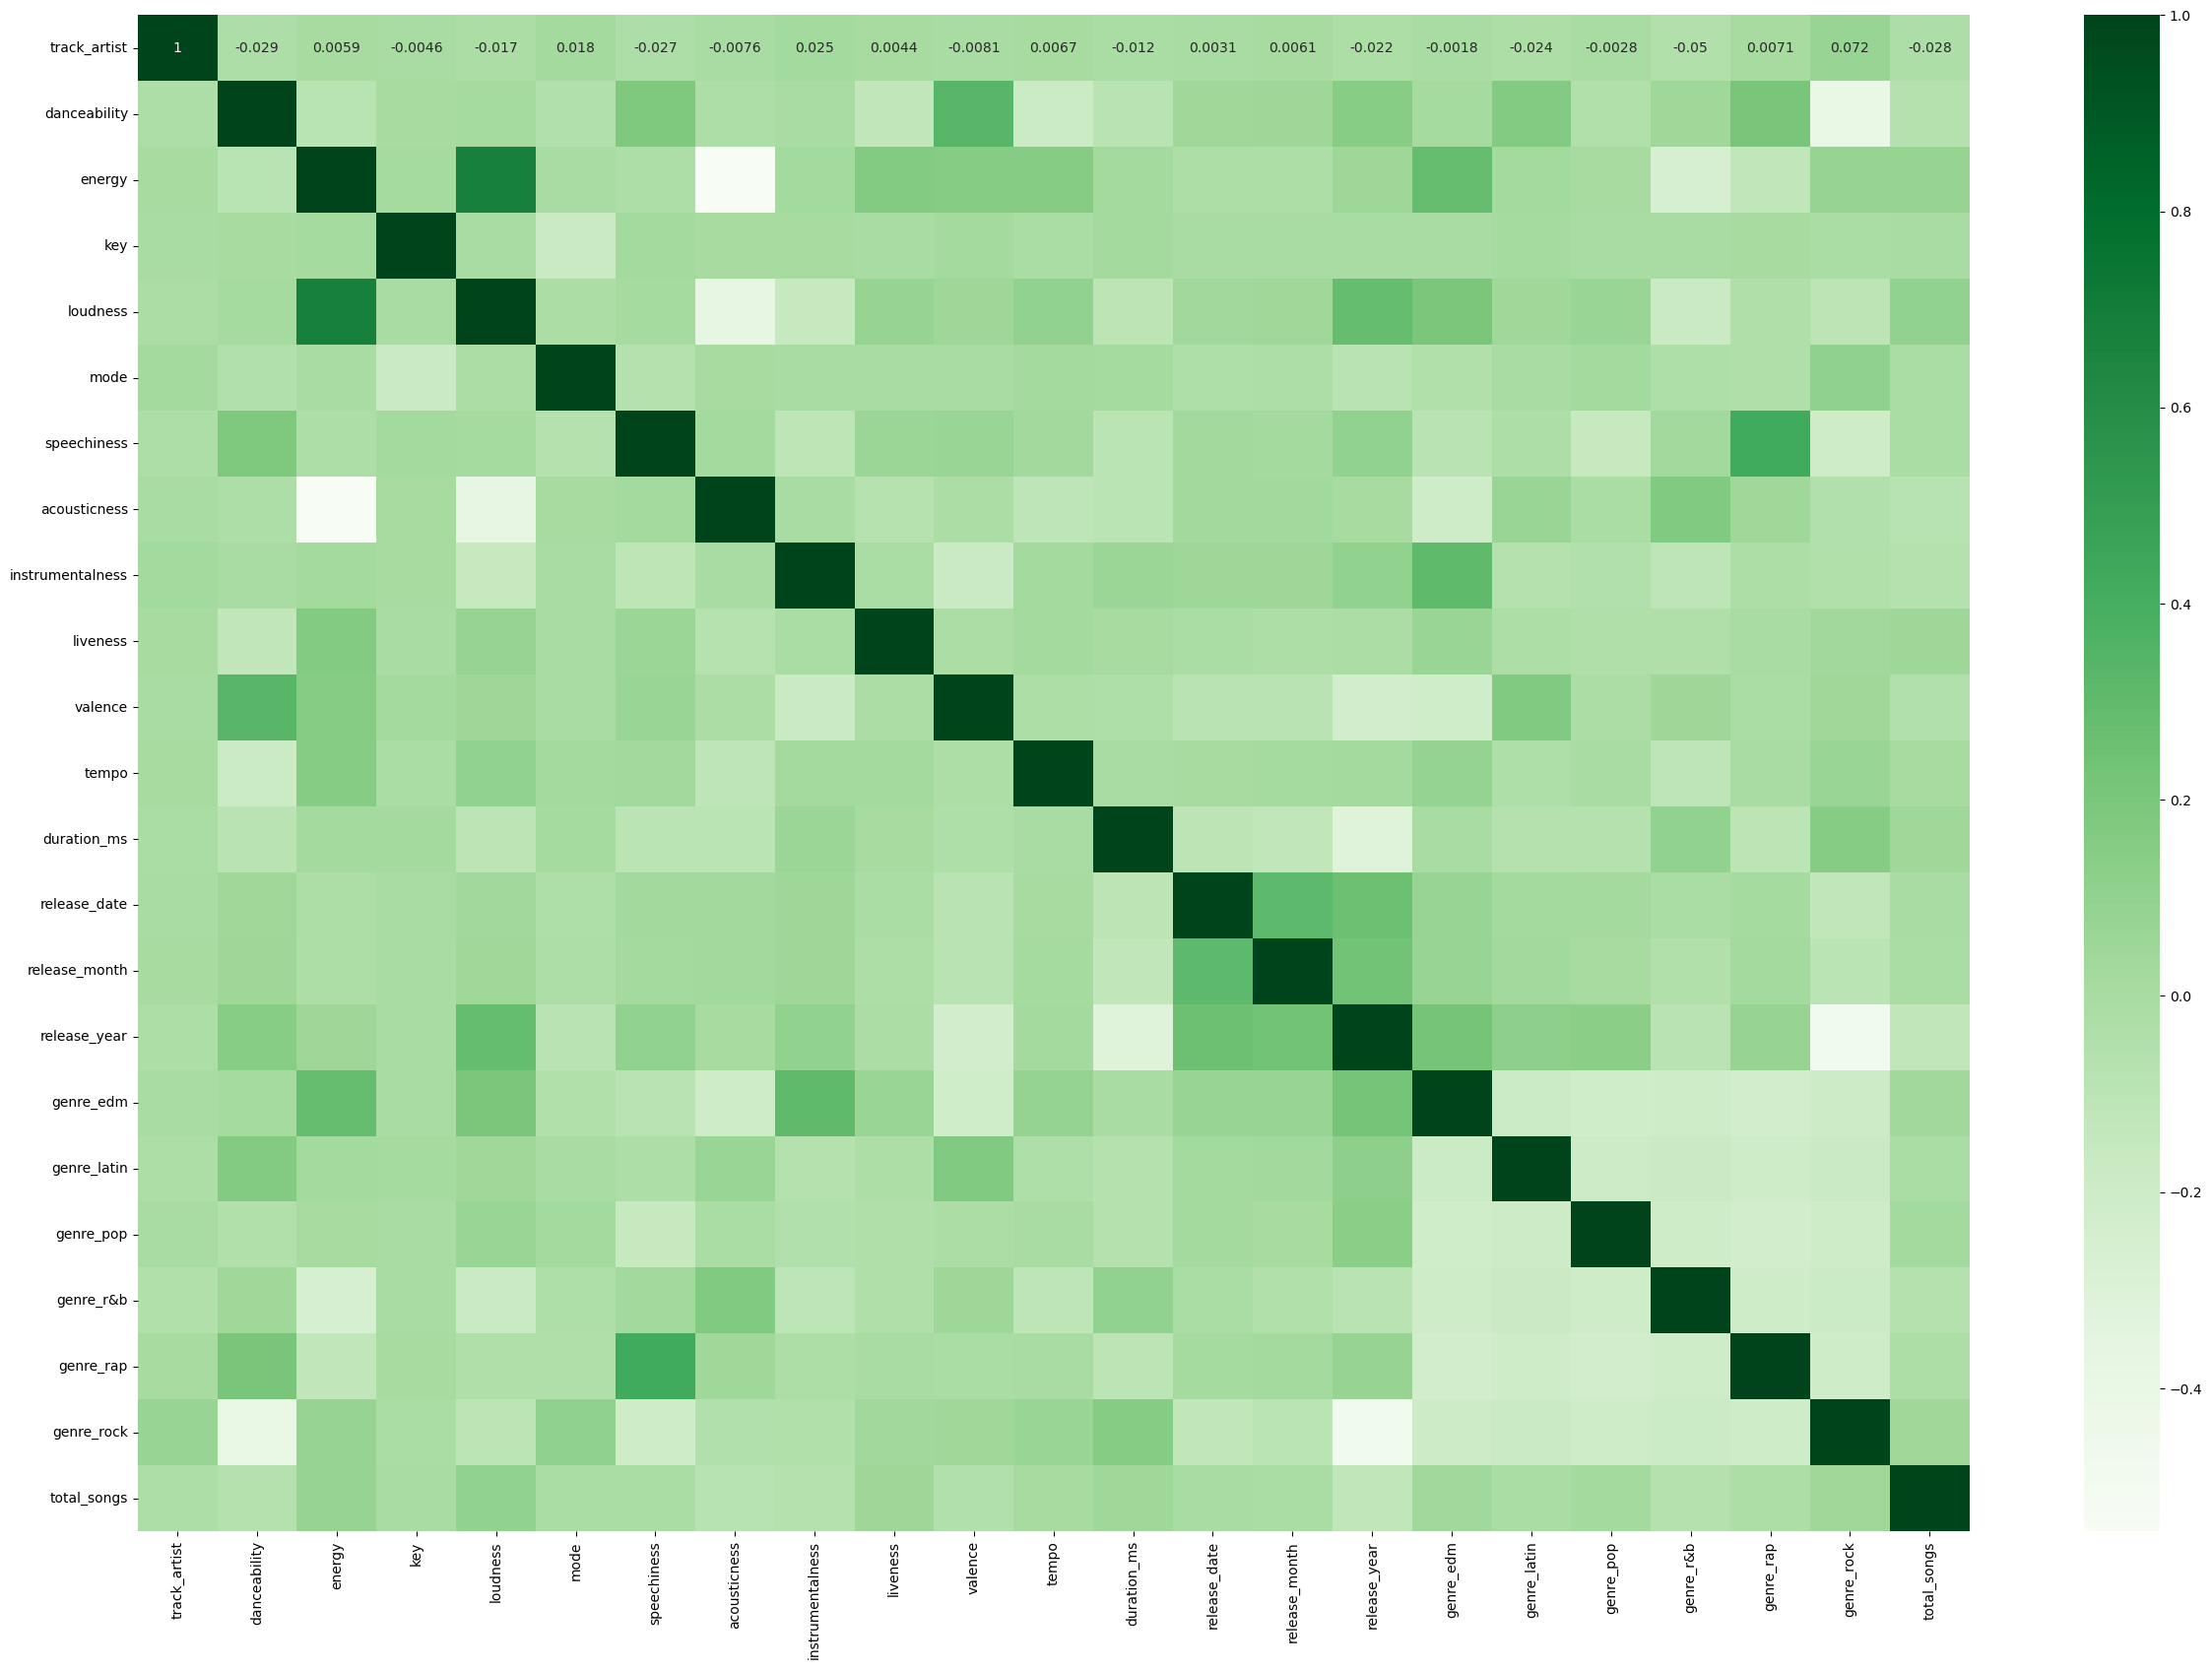

In [94]:
plt.figure(figsize=(30,20))
sns.heatmap(cor,cmap="Greens",annot=True)
plt.show()

C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


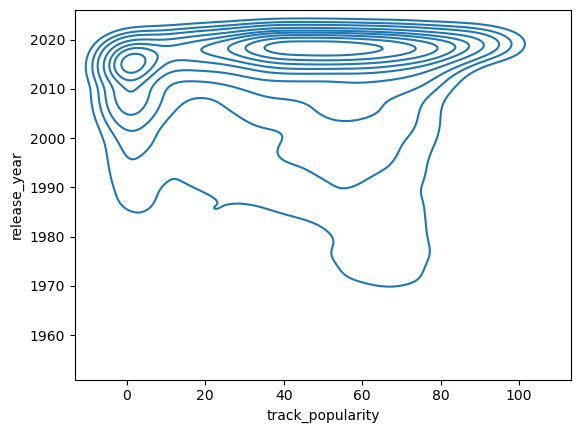

In [18]:
sns.kdeplot(x='track_popularity',y='release_year',data=df)
plt.show()

C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

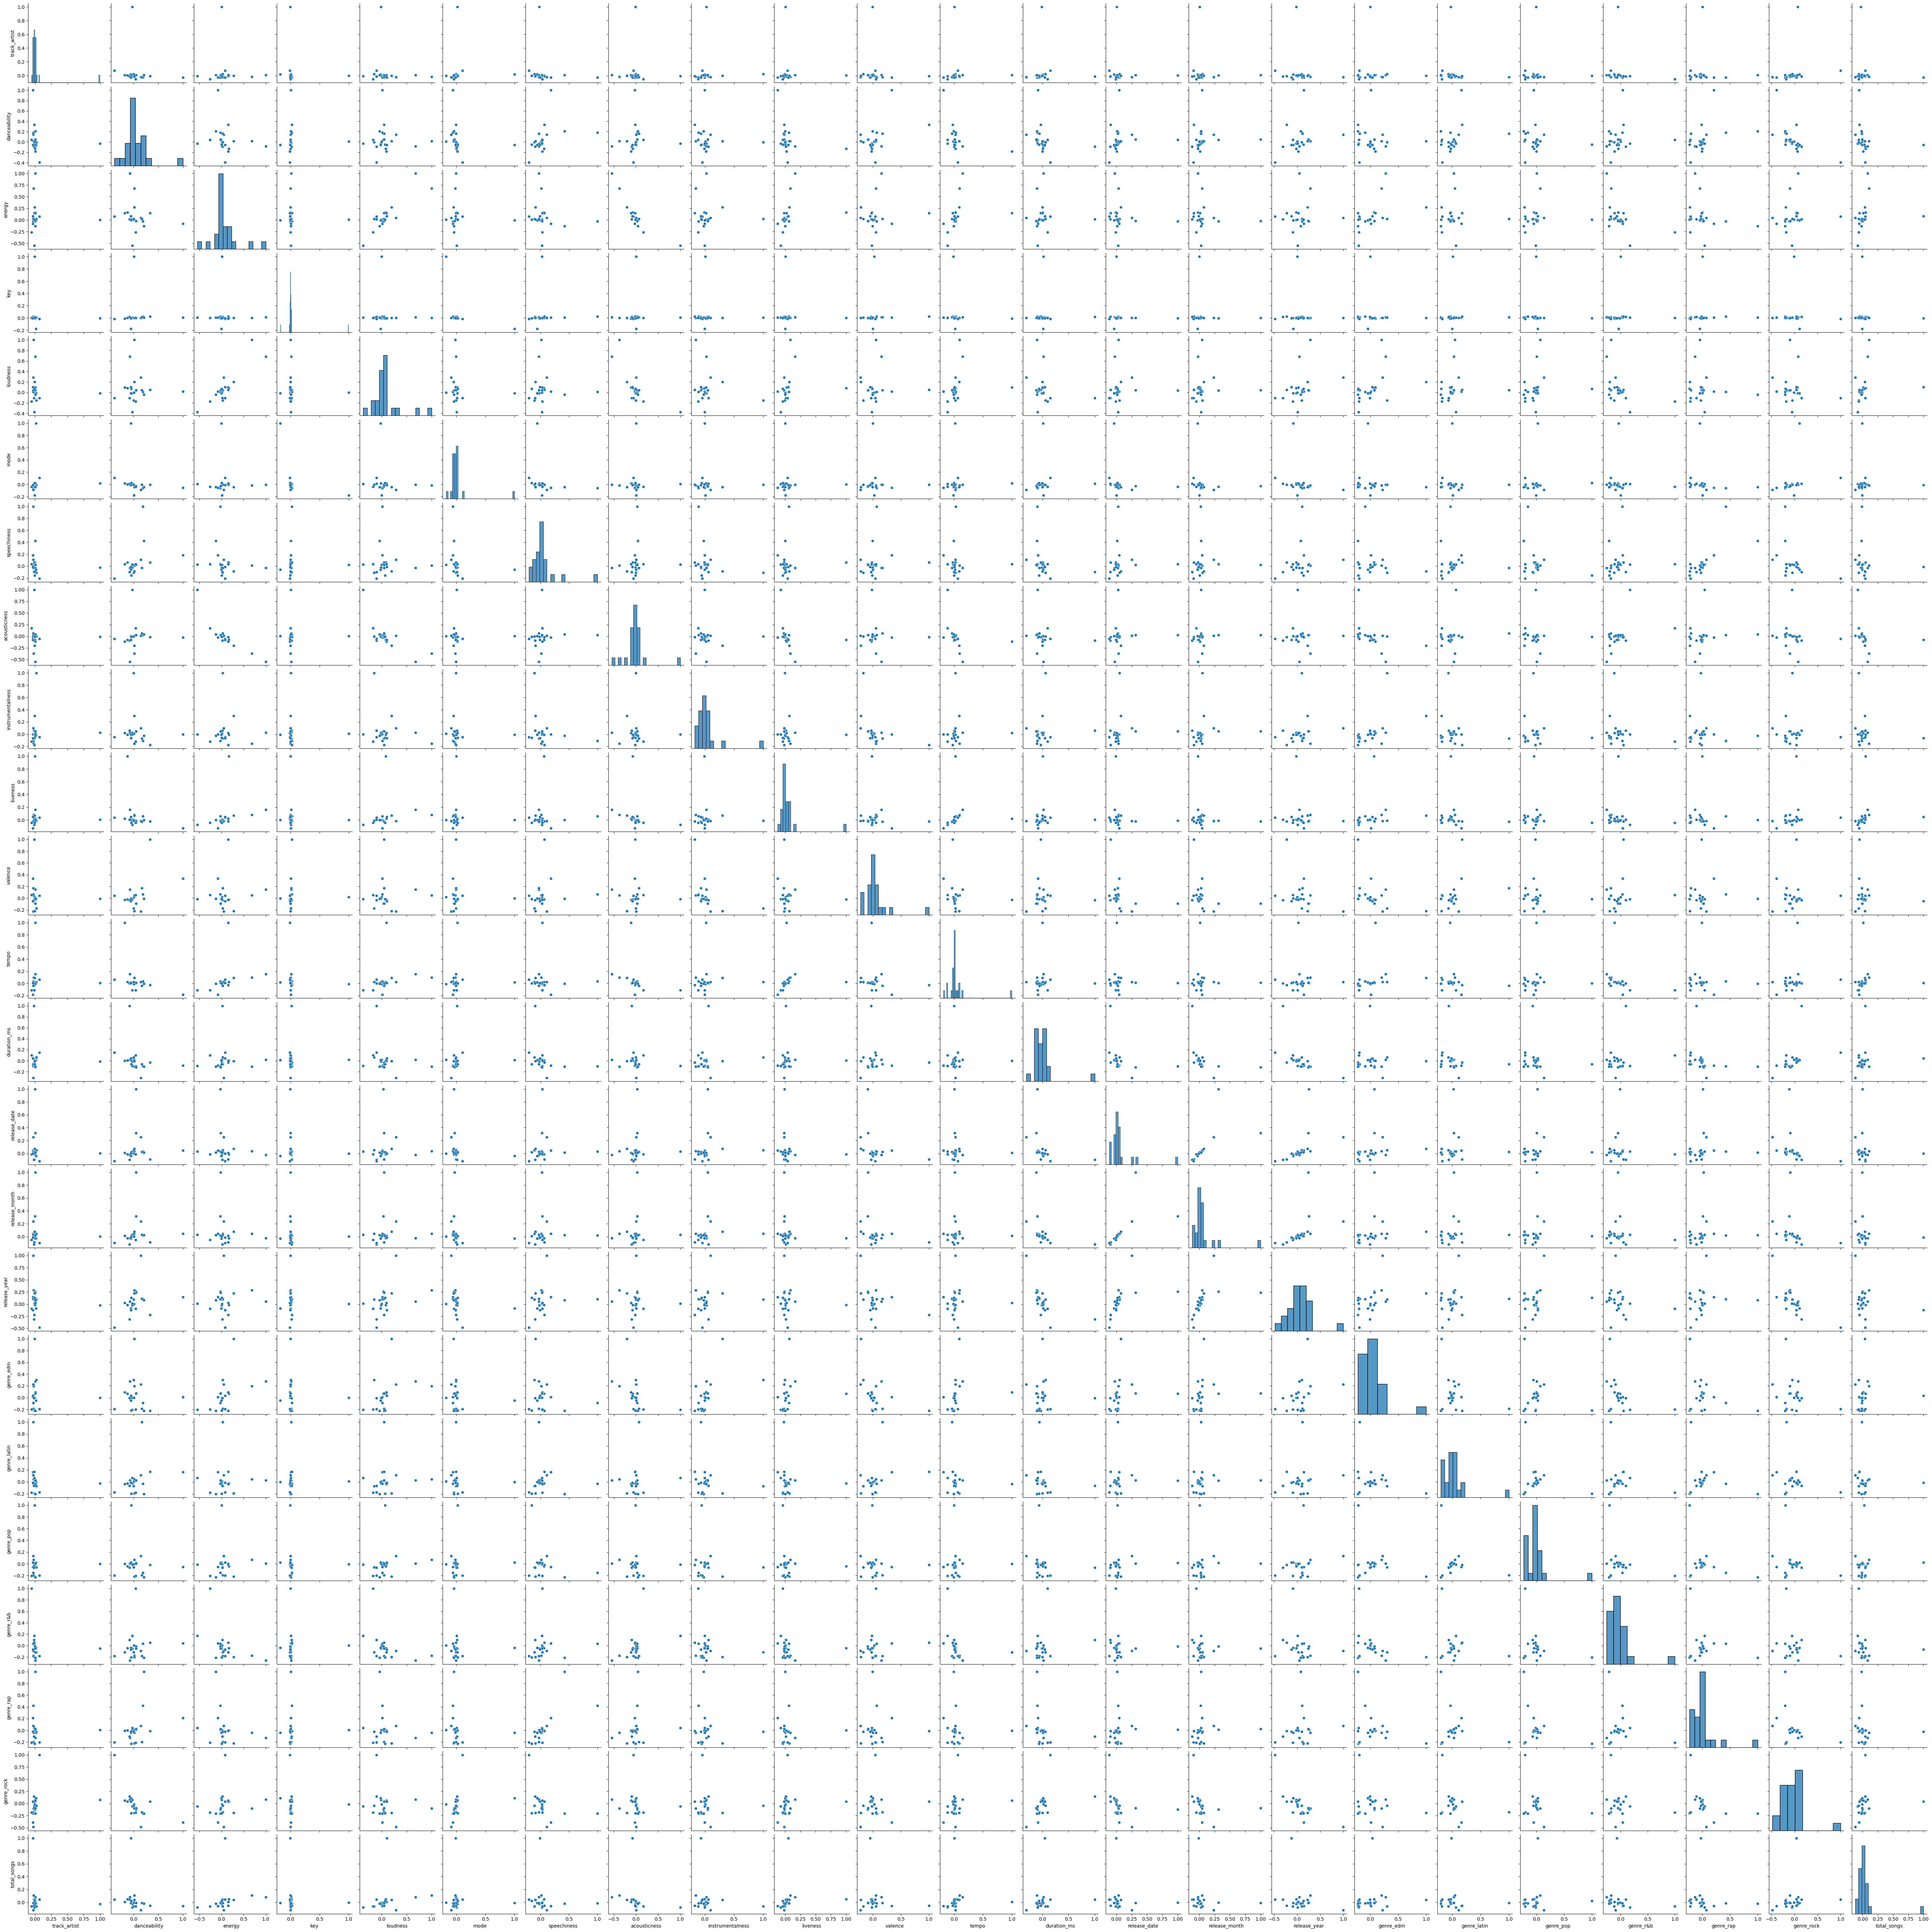

In [95]:
sns.pairplot(cor)
plt.show()

C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


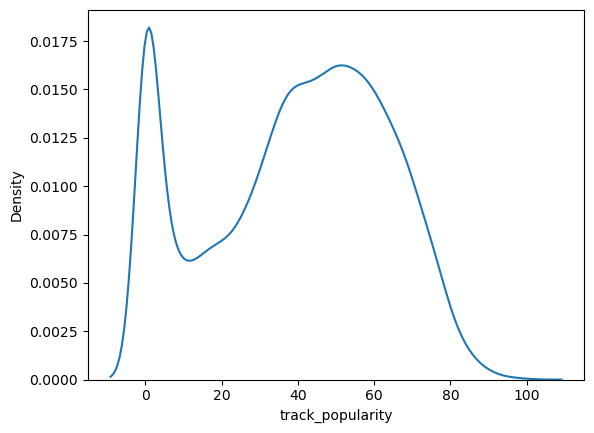

In [96]:
sns.kdeplot(data['track_popularity'])
plt.show()

In [74]:
# data['categorized_popularity'] = {index: 10 if 0 <= value <= 10
#                                   else 9 if 10 < value <= 20
#                                   else 8 if 20 < value <= 30
#                                   else 7 if 30 < value <= 40
#                                   else 6 if 40 < value <= 50
#                                   else 5 if 50 < value <= 60
#                                   else 4 if 60 < value <= 70
#                                   else 3 if 70 < value <= 80
#                                   else 2 if 80 < value <= 90
#                                   else 1 for index, value in enumerate(data['track_popularity'], start=0)}

In [103]:
data['categorized_popularity'] = {index: 3 if 0 <= value <= 33 else 2 if 30 < value <= 66 else 1 for index, value in enumerate(data['track_popularity'], start=0)}

C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


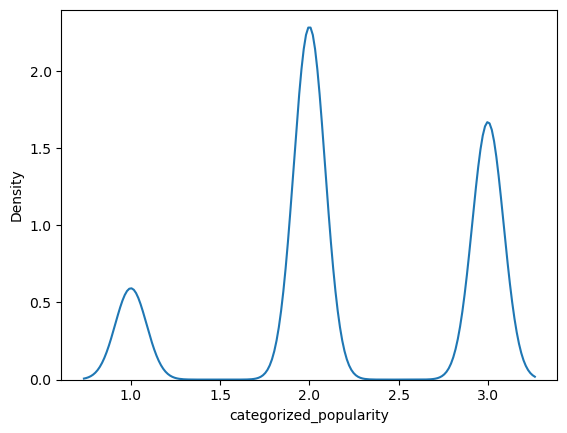

In [104]:
sns.kdeplot(data['categorized_popularity'])
plt.show()

<Axes: xlabel='categorized_popularity', ylabel='count'>

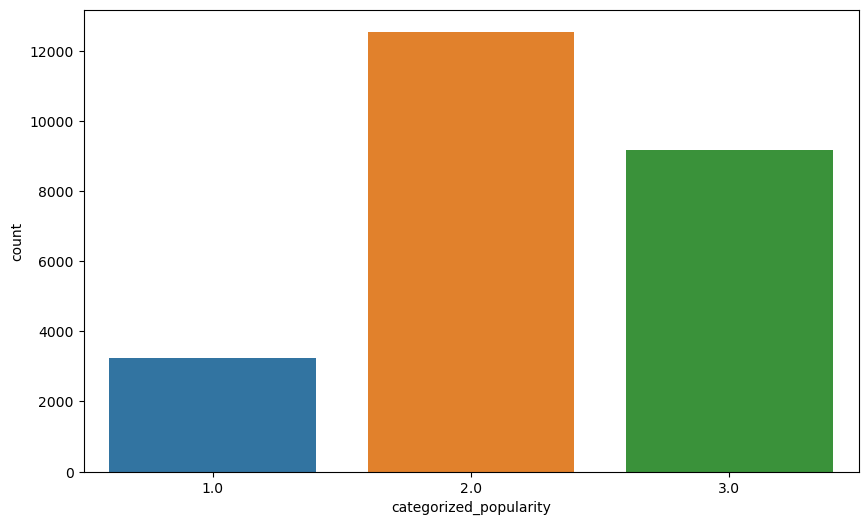

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(x='categorized_popularity', data=data)

In [100]:
#df_with_pca.head()

In [126]:
df_with_pca.shape

(32833, 37)

In [124]:
feature1.head(2)

,track_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,total_songs
0,2782,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,54.098333,2019,0.0,0.0,1.0,0.0,0.0,0.0,69
1,6084,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,45.166667,2019,0.0,0.0,1.0,0.0,0.0,0.0,71


In [140]:
std=feature[feature.columns[1:12]]

In [167]:
feature.drop(['release_date','release_month'],axis=1,inplace=True)

C:\Users\ABRAHAM-ZIEGEN\AppData\Local\Temp\ipykernel_7708\2750363469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature.drop(['release_date','release_month'],axis=1,inplace=True)


In [168]:
feature['duration_ms']=feature['duration_ms']/3600

C:\Users\ABRAHAM-ZIEGEN\AppData\Local\Temp\ipykernel_7708\2216996439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['duration_ms']=feature['duration_ms']/3600


In [169]:
from sklearn.preprocessing import StandardScaler

In [135]:
feature1.iloc[:, 1:12] 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036
1,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972
2,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008
3,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956
4,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976
...,...,...,...,...,...,...,...,...,...,...,...
32828,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170
32829,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041
32830,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989
32831,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008


In [182]:
#standardize columns
columns_to_standardize = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

scaler = StandardScaler()
standardized_data = scaler.fit_transform(feature[columns_to_standardize])
df_standardized = pd.DataFrame(standardized_data, columns=[col + '_standardized' for col in columns_to_standardize])

new1 = pd.concat([feature, df_standardized], axis=1)

In [183]:
new1.head(2)

,track_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,total_songs,categorized_popularity,danceability_standardized,energy_standardized,key_standardized,loudness_standardized,mode_standardized,speechiness_standardized,acousticness_standardized,instrumentalness_standardized,liveness_standardized,valence_standardized,tempo_standardized
0,2782.0,0.748,0.916,6.0,-2.634,1.0,0.0583,0.1020,0.00000,0.0653,0.518,122.036,54.098333,2019.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,2.0,0.649101,1.185900,0.174883,1.377943,0.876574,-0.484169,-0.337416,-0.391826,-0.806061,0.032489,0.040061
1,6084.0,0.726,0.815,11.0,-4.969,1.0,0.0373,0.0724,0.00421,0.3570,0.693,99.972,45.166667,2019.0,0.0,0.0,1.0,0.0,0.0,0.0,71.0,1.0,0.498191,0.635491,1.558453,0.608887,0.876574,-0.688938,-0.470271,-0.373722,1.065111,0.779281,-0.778516


In [185]:
new1.drop(columns_to_standardize,axis=1,inplace=True)

In [186]:
new1.shape

(31769, 22)

In [187]:
new1.isnull().sum()

track_artist                     3413
duration_ms                      3413
release_year                     3413
genre_edm                        3413
genre_latin                      3413
genre_pop                        3413
genre_r&b                        3413
genre_rap                        3413
genre_rock                       3413
total_songs                      3413
categorized_popularity           6826
danceability_standardized        3413
energy_standardized              3413
key_standardized                 3413
loudness_standardized            3413
mode_standardized                3413
speechiness_standardized         3413
acousticness_standardized        3413
instrumentalness_standardized    3413
liveness_standardized            3413
valence_standardized             3413
tempo_standardized               3413
dtype: int64

In [188]:
new1.dropna(inplace=True)

In [189]:
new1.shape

(24943, 22)

In [176]:
feature.head()

,track_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,total_songs,categorized_popularity
0,2782,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,54.098333,2019,0.0,0.0,1.0,0.0,0.0,0.0,69,2.0
1,6084,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,45.166667,2019,0.0,0.0,1.0,0.0,0.0,0.0,71,1.0
2,10417,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,49.060000,2019,0.0,0.0,1.0,0.0,0.0,0.0,28,1.0
3,9215,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,46.970278,2019,0.0,0.0,1.0,0.0,0.0,0.0,123,2.0
4,5402,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,52.514444,2019,0.0,0.0,1.0,0.0,0.0,0.0,21,1.0


In [177]:
feature.describe()

,track_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,total_songs,categorized_popularity
count,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.00000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,24943.000000
mean,5302.482191,0.653372,0.698388,5.368000,-6.817696,0.565489,0.107954,0.177176,0.091117,0.190958,0.510387,120.95618,62.937769,2011.054027,0.171992,0.145895,0.180985,0.158838,0.190471,0.151820,14.312350,2.236900
std,3101.449825,0.145785,0.183503,3.613904,3.036243,0.495701,0.102556,0.222803,0.232548,0.155894,0.234340,26.95456,16.966236,11.229221,0.377380,0.353007,0.385012,0.365531,0.392680,0.358852,22.571577,0.664131
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.111111,1957.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2598.000000,0.561000,0.579000,2.000000,-8.309250,0.000000,0.041000,0.014375,0.000000,0.092600,0.329000,99.97200,52.150556,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,5250.500000,0.670000,0.722000,6.000000,-6.261000,1.000000,0.062600,0.079700,0.000021,0.127000,0.512000,121.99300,60.259167,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000
75%,7967.250000,0.760000,0.843000,9.000000,-4.709000,1.000000,0.133000,0.260000,0.006570,0.249000,0.695000,133.99900,70.826458,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,3.000000
max,10692.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.44000,143.836111,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,161.000000,3.000000


In [178]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_artist            28356 non-null  int32  
 1   danceability            28356 non-null  float64
 2   energy                  28356 non-null  float64
 3   key                     28356 non-null  int64  
 4   loudness                28356 non-null  float64
 5   mode                    28356 non-null  int64  
 6   speechiness             28356 non-null  float64
 7   acousticness            28356 non-null  float64
 8   instrumentalness        28356 non-null  float64
 9   liveness                28356 non-null  float64
 10  valence                 28356 non-null  float64
 11  tempo                   28356 non-null  float64
 12  duration_ms             28356 non-null  float64
 13  release_year            28356 non-null  int32  
 14  genre_edm               28356 non-null  flo

In [179]:
feature.head()

,track_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,total_songs,categorized_popularity
0,2782,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,54.098333,2019,0.0,0.0,1.0,0.0,0.0,0.0,69,2.0
1,6084,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,45.166667,2019,0.0,0.0,1.0,0.0,0.0,0.0,71,1.0
2,10417,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,49.060000,2019,0.0,0.0,1.0,0.0,0.0,0.0,28,1.0
3,9215,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,46.970278,2019,0.0,0.0,1.0,0.0,0.0,0.0,123,2.0
4,5402,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,52.514444,2019,0.0,0.0,1.0,0.0,0.0,0.0,21,1.0


In [190]:
new1.head(2)

,track_artist,duration_ms,release_year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,total_songs,categorized_popularity,danceability_standardized,energy_standardized,key_standardized,loudness_standardized,mode_standardized,speechiness_standardized,acousticness_standardized,instrumentalness_standardized,liveness_standardized,valence_standardized,tempo_standardized
0,2782.0,54.098333,2019.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,2.0,0.649101,1.185900,0.174883,1.377943,0.876574,-0.484169,-0.337416,-0.391826,-0.806061,0.032489,0.040061
1,6084.0,45.166667,2019.0,0.0,0.0,1.0,0.0,0.0,0.0,71.0,1.0,0.498191,0.635491,1.558453,0.608887,0.876574,-0.688938,-0.470271,-0.373722,1.065111,0.779281,-0.778516


In [ ]:
#model

In [308]:
x=new1.drop(['categorized_popularity'],axis=1)
y=new['categorized_popularity']

In [309]:
#my class 1 is having less distribution 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [193]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=27)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.36      0.18      0.24       655
         2.0       0.55      0.71      0.62      2500
         3.0       0.53      0.41      0.46      1834

    accuracy                           0.53      4989
   macro avg       0.48      0.43      0.44      4989
weighted avg       0.52      0.53      0.51      4989



In [226]:
X_train_resampled

(30126, 21)

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [196]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.45099218280216474
              precision    recall  f1-score   support

         1.0       0.24      0.25      0.24       655
         2.0       0.53      0.53      0.53      2500
         3.0       0.42      0.42      0.42      1834

    accuracy                           0.45      4989
   macro avg       0.40      0.40      0.40      4989
weighted avg       0.45      0.45      0.45      4989



In [224]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 3,4,5,6],
    'min_samples_split': [19,22, 18],
    'min_samples_leaf': [1,2, 3],
    'max_features': ['auto','2','3','4','10','5', 'sqrt', 'log2']
}

clf = DecisionTreeClassifier(random_state=55)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.5181399077971537


C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
2160 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:

In [220]:
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 19}

In [199]:
look=pd.DataFrame({'actual': y_test, 'pred': y_pred})
look.head()

,actual,pred
24116,3.0,3.0
20725,2.0,3.0
18464,2.0,2.0
8812,1.0,2.0
7415,2.0,3.0


In [225]:
from sklearn.tree import DecisionTreeClassifier
best_params = {
    'criterion': 'entropy',
    'max_depth': 5,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 19
}
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.5211465223491681


In [257]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

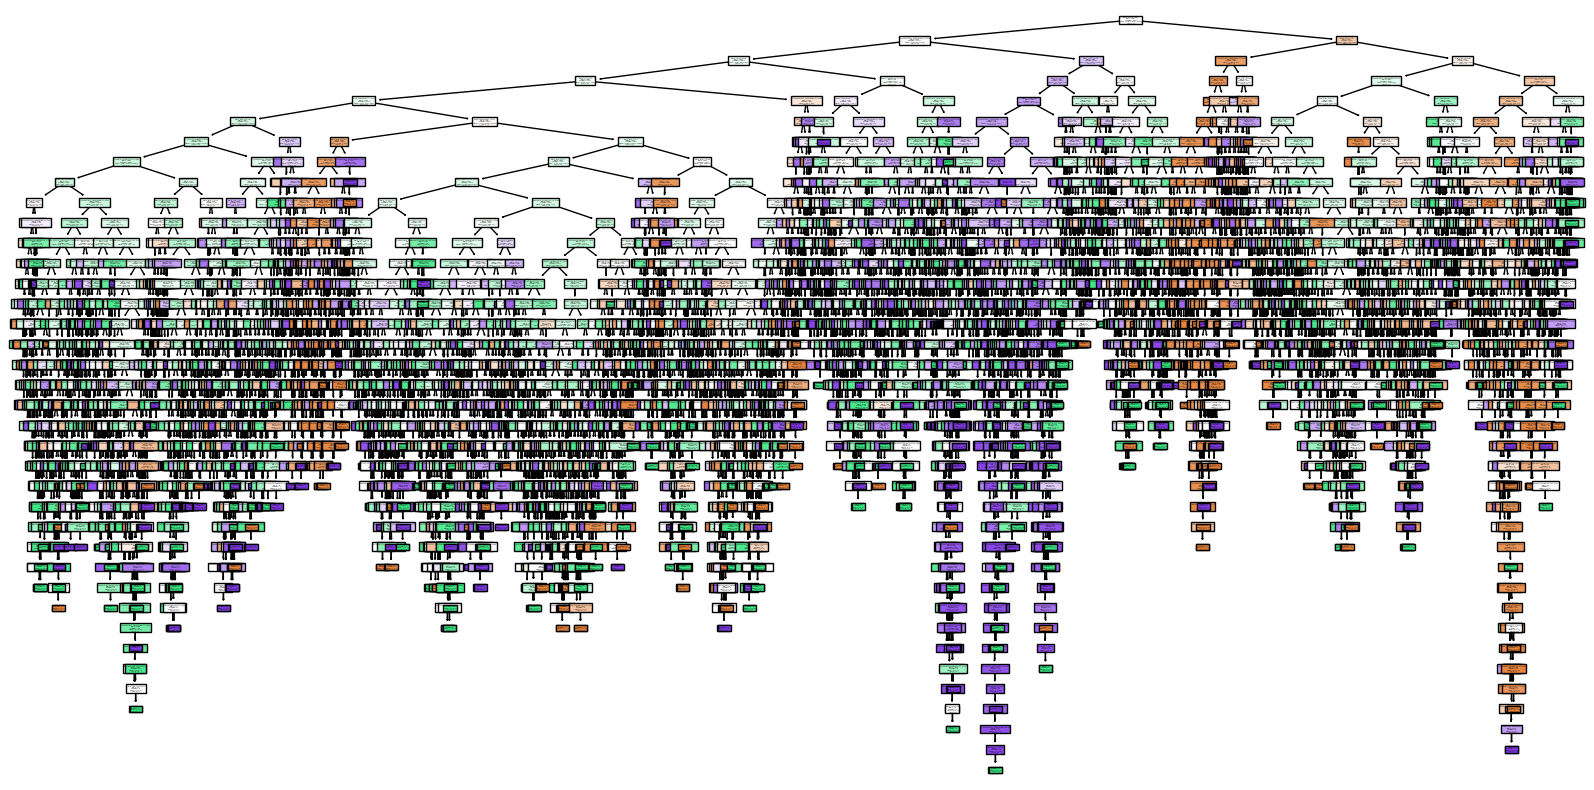

In [258]:
decision_tree = DecisionTreeClassifier(random_state=29)
decision_tree.fit(X_train_resampled, y_train_resampled_int)

plt.figure(figsize=(20, 10)) 
plot_tree(decision_tree, filled=True, feature_names=x.columns, class_names=['1.0', '2.0', '3.0'])
plt.show()

In [236]:
dec_param_cacc=accuracy

In [230]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [234]:
smote = SMOTE(random_state=53)
X_resampled, y_resampled = smote.fit_resample(x, y)

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

new_decision_tree = DecisionTreeClassifier()
new_decision_tree.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = new_decision_tree.predict(X_test_resampled)
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
accuracy_resampled

0.5599255912835504

In [244]:
acc_dec_smote=accuracy_resampled

In [235]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)

y_pred_rf = random_forest.predict(X_test_resampled)

accuracy_rf = accuracy_score(y_test_resampled, y_pred_rf)
print("Accuracy on SMOTE resampled test data for Random Forest:", accuracy_rf)

Accuracy on SMOTE resampled test data (Random Forest): 0.6642306670209939


In [279]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=500, random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)

y_pred_rf = random_forest.predict(X_test_resampled)

accuracy_rf = accuracy_score(y_test_resampled, y_pred_rf)
print("Accuracy on SMOTE resampled test data for Random Forest:", accuracy_rf)

Accuracy on SMOTE resampled test data for Random Forest: 0.6749933563646027


In [282]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimators_values = [100, 200, 300, 400, 500, 600]
accuracy_results = {}
for n_estimators in n_estimators_values:
    random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    random_forest.fit(X_train_resampled, y_train_resampled)
    y_pred_rf = random_forest.predict(X_test_resampled)accuracy_rf = accuracy_score(y_test_resampled, y_pred_rf)
    accuracy_results[n_estimators] = accuracy_rf
    
for n_estimators, accuracy_rf in accuracy_results.items():
    print(f"Accuracy on SMOTE resampled test data for Random Forest with {n_estimators} estimators: {accuracy_rf}")

Accuracy on SMOTE resampled test data for Random Forest with 100 estimators: 0.6642306670209939
Accuracy on SMOTE resampled test data for Random Forest with 200 estimators: 0.6659580122242892
Accuracy on SMOTE resampled test data for Random Forest with 300 estimators: 0.6695455753388254
Accuracy on SMOTE resampled test data for Random Forest with 400 estimators: 0.671671538665958
Accuracy on SMOTE resampled test data for Random Forest with 500 estimators: 0.6749933563646027
Accuracy on SMOTE resampled test data for Random Forest with 600 estimators: 0.672335902205687


In [248]:
from xgboost import XGBClassifier

In [251]:
y_train_resampled_int = y_train_resampled.astype(int)-1
y_test_resampled_int = y_test_resampled.astype(int)-1

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled_int)

y_pred_xgb = xgb_model.predict(X_test_resampled)

accuracy_xgb = accuracy_score(y_test_resampled_int, y_pred_xgb)
print("Accuracy on SMOTE resampled test data (XGBoost):", accuracy_xgb)

Accuracy on SMOTE resampled test data (XGBoost): 0.6456284879085836


## RandomForestAccuracy: 0.6642306670209939 
## Accuracy on SMOTE for Random Forest with 500 estimators: 0.6749933563646027
## DecisionTreeOverSmoteAccuracy: 0.5599255912835504 
## XgBoostClassifierOverSmote: 0.6456284879085836

In [266]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(random_forest,x,y,cv=5)

print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.1741832  0.20344758 0.18059731 0.20910184 0.33961508]
Mean accuracy: 0.22138900448669513


In [209]:
y.unique()

array([2., 1., 3.])

In [204]:
x.columns

Index(['track_artist', 'duration_ms', 'release_year', 'genre_edm',
       'genre_latin', 'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock',
       'total_songs', 'danceability_standardized', 'energy_standardized',
       'key_standardized', 'loudness_standardized', 'mode_standardized',
       'speechiness_standardized', 'acousticness_standardized',
       'instrumentalness_standardized', 'liveness_standardized',
       'valence_standardized', 'tempo_standardized'],
      dtype='object')

In [ ]:
#apply PCA

In [268]:
x.columns

Index(['track_artist', 'duration_ms', 'release_year', 'genre_edm',
       'genre_latin', 'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock',
       'total_songs', 'danceability_standardized', 'energy_standardized',
       'key_standardized', 'loudness_standardized', 'mode_standardized',
       'speechiness_standardized', 'acousticness_standardized',
       'instrumentalness_standardized', 'liveness_standardized',
       'valence_standardized', 'tempo_standardized'],
      dtype='object')

In [275]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [277]:
explained_variance 

array([9.99949892e-01, 5.01084783e-05])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=200, random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)

y_pred_rf = random_forest.predict(X_test_resampled)

In [259]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# X = features.drop('categorized_popularity', axis=1) 
# Y=features['categorized_popularity']
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif_data

In [283]:
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import mean_squared_error

In [287]:
residuals = new['categorized_popularity'] - random_forest.predict(new.drop('categorized_popularity', axis=1))
random_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=600, random_state=42)

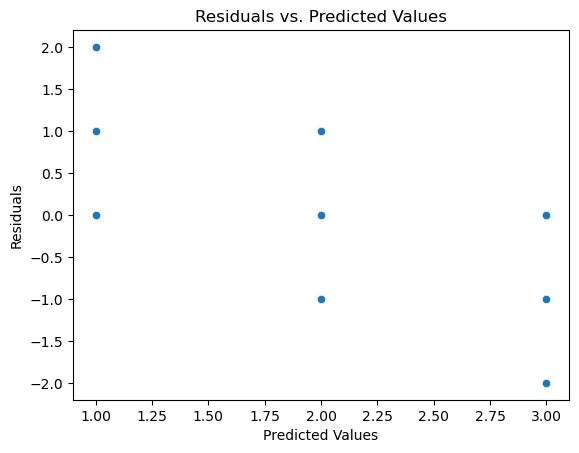

In [296]:
sns.scatterplot(x=random_forest.predict(new.drop('categorized_popularity', axis=1)), y=residuals)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


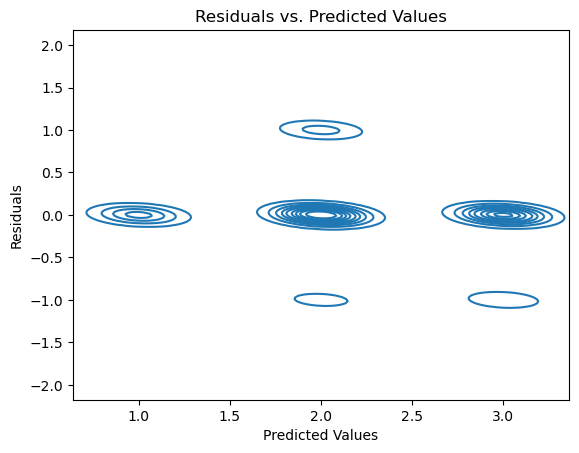

In [294]:
sns.kdeplot(x=random_forest.predict(new.drop('categorized_popularity', axis=1)), y=residuals)
#plt.figure(figsize=(20,10))
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [299]:
import statsmodels.api as sm
mod_sm = sm.OLS(y,X_sm)
res_sm = mod_sm.fit()

bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(res_sm.resid, res_sm.model.exog)

print("Lagrange multiplier statistic: " + str(bp_lm))
print("Lagrange multiplier p-value:   " + str(bp_lm_pvalue))
print("F-statistic:                   " + str(bp_fvalue))
print("P-value of F-statistic:        " + str(bp_f_pvalue))

if bp_lm_pvalue < 0.05:
    print("Heteroscedasticity detected")
else:
    print("No heteroscedasticity detected")

ValueError: The Breusch-Pagan test requires exog to have at least two columns where one is a constant.

In [108]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.1/99.8 MB 1.4 MB/s eta 0:01:10
   ---------------------------------------- 0.6/99.8 MB 4.5 MB/s eta 0:00:23
   ---------------------------------------- 1.2/99.8 MB 7.0 MB/s eta 0:00:15
    --------------------------------------- 1.9/99.8 MB 8.6 MB/s eta 0:00:12
    --------------------------------------- 2.5/99.8 MB 9.4 MB/s eta 0:00:11
   - -------------------------------------- 3.2/99.8 MB 9.6 MB/s eta 0:00:11
   - -------------------------------------- 3.6/99.8 MB 9.9 MB/s eta 0:00:10
   - --------------------------------

In [110]:
pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/e9/3e4879974a7c4dcaca2a746dde3df08d0ae8f14c74b03591616ce5f0a8b1/scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:17
    --------------------------------------- 0.1/10.6 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/10.6 MB 4.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/10.6 MB 7.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/10.6 MB 8.8 MB/s eta 0:00:01
   ---------- ----------------------------- 2.7/10.6 MB 10.3 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.6 MB 10.2 MB/s eta 0:00:01
   --------------- ------------------------ 4.1/10.6 MB 10.8 MB/s eta 0:00:01
   ----------------

In [112]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [113]:
features

,track_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_month,release_year,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,song_by_artist,categorized_popularity
3693,0,0.702,0.851,10,-5.747,0,0.0407,0.00255,0.000059,0.3220,0.870,117.004,243627,1,1,2013,0.0,0.0,1.0,0.0,0.0,0.0,56,3.0
5462,0,0.709,0.831,2,-6.847,0,0.0391,0.10800,0.001280,0.1590,0.866,104.971,227067,1,1,2013,0.0,0.0,1.0,0.0,0.0,0.0,2069,2.0
27393,1,0.931,0.710,0,-4.677,0,0.0553,0.13900,0.000033,0.0803,0.821,125.043,223507,1,1,2012,1.0,0.0,0.0,0.0,0.0,0.0,55,2.0
27364,1,0.773,0.902,7,-3.360,0,0.0377,0.05370,0.067400,0.0685,0.667,118.977,254213,18,1,2019,1.0,0.0,0.0,0.0,0.0,0.0,2074,1.0
18251,1,0.666,0.842,9,-6.513,0,0.0878,0.07750,0.002600,0.0884,0.769,119.966,172500,22,11,2019,0.0,1.0,0.0,0.0,0.0,0.0,4093,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,10688,0.554,0.782,0,-2.927,1,0.0367,0.19800,0.000000,0.0756,0.630,155.912,193417,8,1,2020,0.0,0.0,1.0,0.0,0.0,0.0,63,2.0
408,10689,0.711,0.934,11,-0.700,1,0.0588,0.04450,0.000009,0.0537,0.866,124.988,224333,20,11,2019,0.0,0.0,1.0,0.0,0.0,0.0,62,3.0
1065,10690,0.721,0.861,4,-4.870,0,0.0847,0.15100,0.000000,0.1180,0.640,132.065,231933,23,1,2019,0.0,0.0,1.0,0.0,0.0,0.0,62,1.0
14370,10691,0.389,0.597,7,-8.436,1,0.0308,0.53400,0.406000,0.1440,0.506,143.943,400560,1,3,2016,0.0,0.0,0.0,0.0,0.0,1.0,59,2.0


In [116]:
x=features.drop('categorized_popularity',axis=1)
Y=features['categorized_popularity']

In [126]:
x.shape

(28356, 23)

In [127]:
y.shape

(28356,)

In [128]:
y

array([2, 1, 1, ..., 0, 1, 0], dtype=int64)

In [117]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [135]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

model = XGBClassifier()

cv_scores = cross_val_score(model,x,y,cv=10, scoring='accuracy')  # You can choose a different scoring metric

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.45416079 0.46509168 0.40267983 0.4167842  0.41643159 0.45204513
 0.46419753 0.45890653 0.49171076 0.43386243]
Mean Accuracy: 0.4455870478578518


In [313]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

model = XGBClassifier()
Y=y.astype(int) -1
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [5, 7,10],           
    'learning_rate': [0.01,0.07,0.05,0.1]  
}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=39)
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(x, Y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
Best Accuracy: 0.5459641817717231


In [ ]:
# Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
# Best Accuracy: 0.5459641817717231

In [310]:
y.unique()

array([2., 1., 3.])

In [302]:
y=y.astype(int) -1

In [312]:
Y.unique()

array([1, 0, 2])

In [130]:
y_pred.shape

(8507,)

In [ ]:
sklear

In [321]:
pip install plot_roc_curve

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement plot_roc_curve (from versions: none)
ERROR: No matching distribution found for plot_roc_curve


In [320]:
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\ABRAHAM-ZIEGEN\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [322]:
# plot_roc_curve(model, X_test, y_test)
# plt.show()

In [315]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [137]:
pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/e9/3e4879974a7c4dcaca2a746dde3df08d0ae8f14c74b03591616ce5f0a8b1/scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl (10.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
Note: you may need to restart the kernel to use updated packages.
